# PDAP2019: Homework assignment 05

## Logistics

* This homework exercise consists of this notebook.
* Submit this homework by saving this notebook to the folder `/home/pdap2019/YOURUSERNAME/homework/03/submission` on your Jupyter at https://aether.uni-bremen.de/lamoslab (you will need to create that folder).
* Make sure that in that folder, there is only one `*.ipynb` file.  **If there is more than one `*.ipynb` in the submission folder, I will not correct your homework!**
* I will collect your submission **on Tuesday 25 June 2019 at 08:00** automatically.  Late submission is not possible.  Submission via other means is not possible.
* You can use the command `pdap2019_check_submission` (on the Terminal) to see if you placed the file in the correct location.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Problem

Today we want to look into a simple chemical reaction which follows the scheme $X\longrightarrow Y$, $Y\longrightarrow Z$, in which a molecule of species $X$ is first converted into a molecule of species $Y$, which is then subsequently converted into species $Z$.

The concentrations of the three species at time $t$ are called $C_X=C_X(t)$, $C_Y=C_Y(t)$, $C_Z=C_Z(t)$.

When we introduce two constants (called reaction rate) $k_1$ and $k_2$, we can formulate this system as follows:

$$ \left(\begin{array}{c} C_X'\\C_Y'\\C_Z'\end{array}\right)  =
   \left(\begin{array}{ccc} -k_1 & 0 & 0\\ k_1 & -k_2 & 0\\ 0 & k_2 & 0\end{array}\right) 
   \cdot
   \left(\begin{array}{c} C_X\\C_Y\\C_Z\end{array}\right)
   $$


Solve this system of ordinary differential equations for reaction rates $k_1 = 1.0$ and $k_2 = 0.3$, with the initial conditions $C_X(0) = 42$, $C_Y(0)=C_Z(0)=0$ using `scipy.integrate.odeint`, and create a plot of the three concentrations from time $t=0 \ldots 10$.

In [1]:
import numpy as np
from scipy.integrate import odeint

In [3]:
k1, k2 = 1.0, 0.3

In [4]:
C_0 = [42., 0., 0.]

In [5]:
times = np.linspace(0., 10., 101)

In [6]:
def deriv(cvec, times, k1, k2):
    CX, CY, CZ = cvec
    return [-k1 * CX, k1 * CX - k2 * CY, k2 * CY]

In [8]:
solution = odeint(deriv, C_0, times, args=(k1, k2))

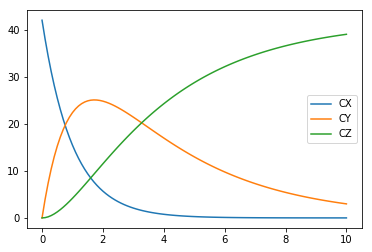

In [9]:
plt.plot(times, solution[:, 0], label='CX')
plt.plot(times, solution[:, 1], label='CY')
plt.plot(times, solution[:, 2], label='CZ')
plt.legend();